In [1]:
# Question 8: Detect road land markers 

import cv2
import numpy as np
import math

import matplotlib.pyplot as plt

# Reading image of road
road_image = cv2.imread("road6.jpg")
cv2.imshow("Road Image ",road_image)
cv2.waitKey()
cv2.destroyAllWindows()


In [2]:
# Converting image to grayscale and applying histogram eqlualization 
# to get distributed values of black road and white lane
gray_road_image = cv2.cvtColor(road_image, cv2.COLOR_BGR2GRAY)
hist_equalized = cv2.equalizeHist(gray_road_image)

cv2.imshow("Grayscale Road Image ",gray_road_image)
cv2.imshow("Grayscale Equalized ",hist_equalized)

cv2.waitKey()
cv2.destroyAllWindows()

In [3]:
#Image binary thresholding can also be applied to easily differentiate between the road(black) and lane(white)
thresh = 150
binary_white_image = cv2.threshold(hist_equalized, thresh, 255, cv2.THRESH_BINARY)[1]

cv2.imshow("Thresholded binary image ",binary_white_image)
cv2.waitKey()
cv2.destroyAllWindows()


In [5]:

# Appliying gaussian blur to remove small noisy elements
gaussian_image = cv2.GaussianBlur(binary_white_image,(7,7),3)

cv2.imshow("Gaussian Applied",gaussian_image)
cv2.waitKey(10000)
cv2.destroyAllWindows()


In [6]:
# selecting region
# Since the white lanes will be in front of the car, 
# we need to select polygon area or road and apply further operations on it
imshape = gaussian_image.shape
lower_left = [0,imshape[0]]
lower_right = [imshape[1],imshape[0]]
middle_left = [0,imshape[0]*3/4]
middle_right = [imshape[1],imshape[0]*3/4]
top_middle = [imshape[1]/2,imshape[0]/2]

vertices = np.array([[lower_left,middle_left,  top_middle, middle_right, lower_right]], dtype=np.int32)

mask = np.zeros_like(gaussian_image)
cv2.fillPoly(mask, vertices, 255)

roi_image = cv2.bitwise_and(gaussian_image, mask)
cv2.imshow("Image after extracted ROI", roi_image)
cv2.waitKey()
cv2.destroyAllWindows()

In [7]:
# Apply canny edge detection to find out the lanes on road
canny_image = cv2.Canny(roi_image, 100, 200)

cv2.imshow("Canny edge on ROI",canny_image)
cv2.waitKey()
cv2.destroyAllWindows()

print(canny_image.shape)


(720, 1280)


In [8]:
# Get lines based on the edge detected image, parameters are set to join the lane parts in case of dashed lines.
lines = cv2.HoughLinesP(canny_image,
    rho=1,
    theta=np.pi / 180,
    threshold=40,
    lines=np.array([]),
    minLineLength=20,
    maxLineGap=100
)
#print(lines)


In [9]:
# Plotting lines on a blank canvas
line_img = np.zeros((road_image.shape[0],road_image.shape[1],3),dtype=np.uint8)

for line in lines:
        for x1, y1, x2, y2 in line:
            
            slope = math.fabs((x1-x2)/(y1-y2))
            #print(slope)
            if 1.33 <= slope <= 1.85:
                cv2.line(line_img, (x1, y1), (x2, y2), [0,255,0], 3)

# Merging both drawn lines and actual road image 
final_image = cv2.addWeighted(road_image, 0.8, line_img, 0.5, 0.0)
cv2.imshow("Final Image", final_image)
cv2.waitKey()
cv2.destroyAllWindows()


d:\program files\python\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in int_scalars
  import sys


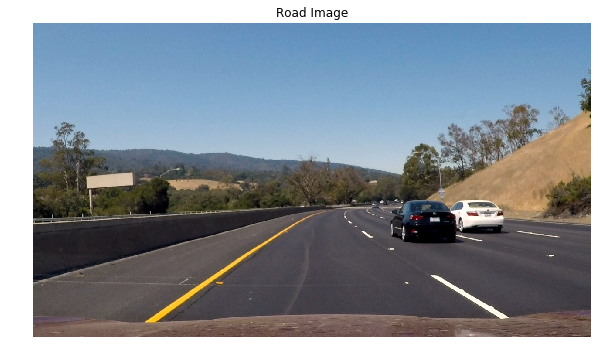

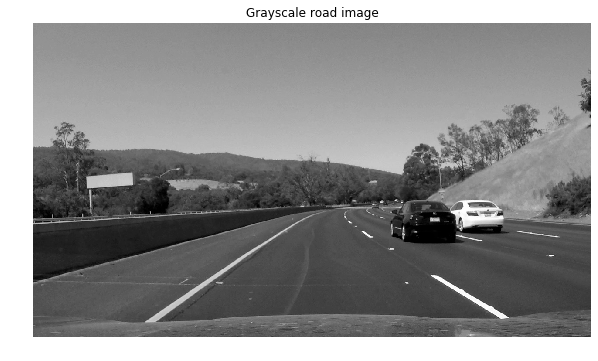

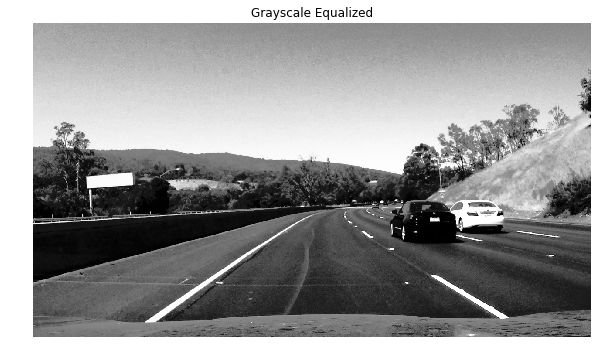

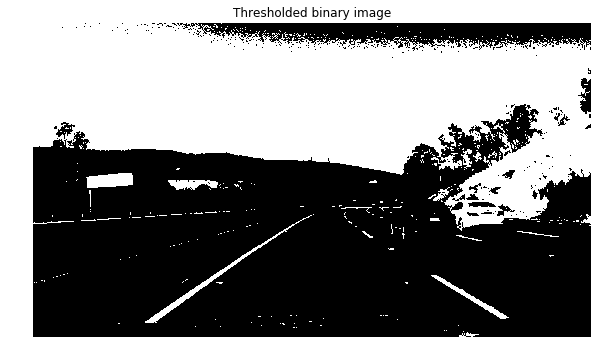

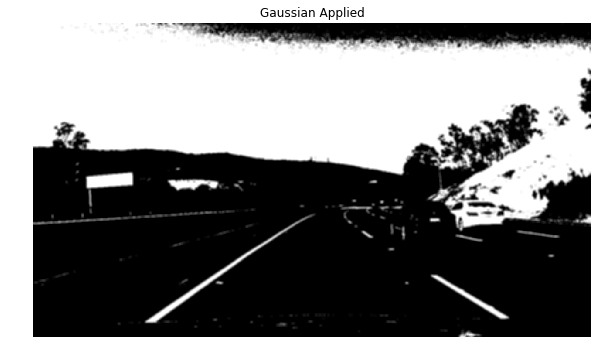

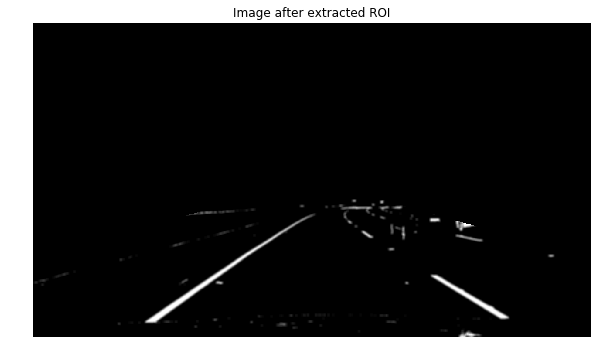

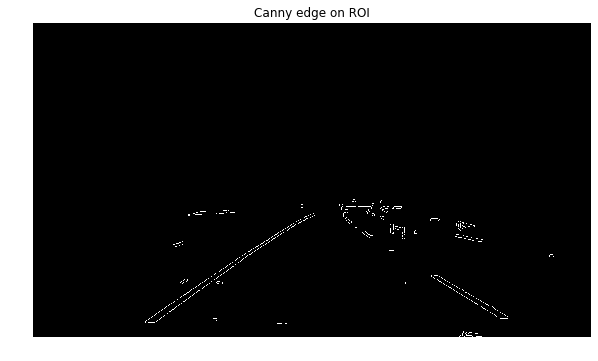

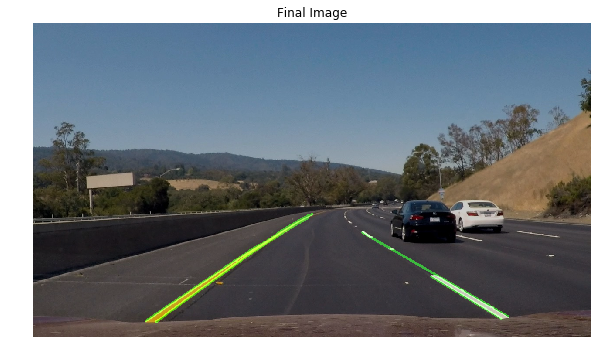

In [10]:


plt.figure(figsize=(10,10))
plt.axis("Off")
plt.title("Road Image")
plt.imshow(cv2.cvtColor(road_image, cv2.COLOR_BGR2RGB))
plt.show()

plt.figure(figsize=(10,10))
plt.axis("Off")
plt.title("Grayscale road image")
plt.imshow(gray_road_image, cmap="gray")
plt.show()

plt.figure(figsize=(10,10))
plt.axis("Off")
plt.title("Grayscale Equalized")
plt.imshow(hist_equalized, cmap="gray")
plt.show()


plt.figure(figsize=(10,10))
plt.axis("Off")
plt.title("Thresholded binary image")
plt.imshow(binary_white_image, cmap="gray")
plt.show()

plt.figure(figsize=(10,10))
plt.axis("Off")
plt.title("Gaussian Applied")
plt.imshow(gaussian_image, cmap="gray")
plt.show()

plt.figure(figsize=(10,10))
plt.axis("Off")
plt.title("Image after extracted ROI")
plt.imshow(roi_image, cmap="gray")
plt.show()

plt.figure(figsize=(10,10))
plt.axis("Off")
plt.title("Canny edge on ROI")
plt.imshow(canny_image, cmap="gray")
plt.show()

plt.figure(figsize=(10,10))
plt.axis("Off")
plt.title("Final Image")
plt.imshow(cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB))
plt.show()

